<a href="https://colab.research.google.com/github/daviethedeveloper/TensorFlowNotes/blob/main/03_Introduction_Computer_Vision_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms in which can discover patterns in visual data.

Using only 2 classes
- Pizza
- Steak

# Get the data

In [ ]:
import numpy as np

np.convolve([1, 2, 3], [4, 5, 6])

array([ 4, 13, 28, 27, 18])

In [ ]:
import zipfile

# Get this file and download
# Get this file and download to Google Collab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-05 18:56:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.6MB/s    in 3.3s    

2023-07-05 18:56:52 (31.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

"Becoming One with The Data"

In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)}, directories and {len(filenames)} images in `{dirpath}`.")

There are 2, directories and 0 images in `pizza_steak`.
There are 2, directories and 0 images in `pizza_steak/train`.
There are 0, directories and 750 images in `pizza_steak/train/steak`.
There are 0, directories and 750 images in `pizza_steak/train/pizza`.
There are 2, directories and 0 images in `pizza_steak/test`.
There are 0, directories and 250 images in `pizza_steak/test/steak`.
There are 0, directories and 250 images in `pizza_steak/test/pizza`.


In [ ]:
# Another way to see the length of the files in the directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

Visualize images, get class names programmatically

In [ ]:
# Get the images programmatically
import pathlib
import numpy as np

# Convert the path into an object
dir_path = pathlib.Path("pizza_steak/train")
test_dir_path = pathlib.Path("pizza_steak/test")

# Create a list of class names of sub directories in the train folder
class_names = np.array(sorted([item.name for item in dir_path.glob("*")]))
print(class_names)

class_names_test = np.array(sorted([item.name for item in test_dir_path.glob("*")]))
print(class_names_test)

['pizza' 'steak']
['pizza' 'steak']


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  """
  Get a random image - target directory as well as the target class getting from

  """

  target_folder = target_dir + target_class

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f'Name of Image: {random_image}')

  # Read in the image then plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])


  # Show the image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f'Image shape: {img.shape}')

  return img

Name of Image: ['3002350.jpg']
Image shape: (512, 289, 3)


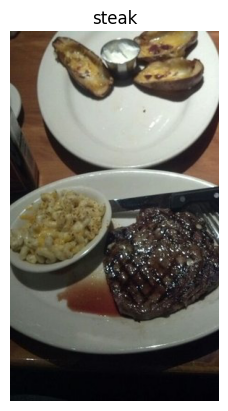

In [ ]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[ 57,  54,  37],
        [ 60,  57,  42],
        [ 66,  60,  48],
        ...,
        [142,  92,  65],
        [142,  92,  65],
        [137,  94,  62]],

       [[ 54,  51,  36],
        [ 57,  54,  39],
        [ 62,  58,  46],
        ...,
        [149,  99,  72],
        [149,  99,  72],
        [146, 103,  71]],

       [[ 51,  47,  35],
        [ 53,  49,  37],
        [ 58,  54,  43],
        ...,
        [161, 112,  82],
        [161, 112,  82],
        [158, 115,  83]],

       ...,

       [[  7,  12,  15],
        [  7,  12,  15],
        [  7,  12,  15],
        ...,
        [  4,   3,   8],
        [  4,   3,   8],
        [  4,   3,   8]],

       [[  6,  11,  14],
        [  6,  11,  14],
        [  7,  12,  15],
        ...,
        [  4,   3,   8],
        [  4,   3,   8],
        [  4,   3,   8]],

       [[ 11,  16,  19],
        [ 11,  16,  19],
        [ 11,  16,  19],
        ...,
        [  4,   3,   

In [ ]:
# View the image shape
img.shape

# Width, height, color channel

(436, 512, 3)

In [ ]:
# Normalize the Data
img/225.

array([[[1.06222222, 0.97333333, 0.82666667],
        [1.06666667, 0.97777778, 0.83111111],
        [1.06666667, 0.97777778, 0.83111111],
        ...,
        [1.10222222, 0.99555556, 0.82666667],
        [1.10222222, 0.99555556, 0.82666667],
        [1.10222222, 0.99555556, 0.82666667]],

       [[1.04888889, 0.96      , 0.81333333],
        [1.05333333, 0.96444444, 0.81777778],
        [1.06222222, 0.97333333, 0.82666667],
        ...,
        [1.10222222, 0.99555556, 0.82666667],
        [1.10222222, 0.99555556, 0.82666667],
        [1.10222222, 0.99555556, 0.82666667]],

       [[1.06222222, 0.96      , 0.81777778],
        [1.06222222, 0.96      , 0.81777778],
        [1.06666667, 0.96444444, 0.82222222],
        ...,
        [1.10222222, 0.99555556, 0.82666667],
        [1.10222222, 0.99555556, 0.82666667],
        [1.10222222, 0.99555556, 0.82666667]],

       ...,

       [[1.06222222, 0.96888889, 0.83111111],
        [1.06222222, 0.96888889, 0.83111111],
        [1.06666667, 0

## End - to - end project

* Load the images
* Preprocess the images
* Build the CNN to find patterns in the images
* Compile the CNN
* Fit the CNN in the training Data

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Set the seed for reproducibility
tf.random.set_seed(42)


# Preprocess data Scaling/Normalization of the data
# This is Data Augmentation Right here rescale the values
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1/255)


# Set up paths for the data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from dicertories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN Binary classification problem (metrics??)
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 306ms/step - loss: 0.5894 - accuracy: 0.6900 - val_loss: 0.4355 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 13s 275ms/step - loss: 0.4427 - accuracy: 0.8007 - val_loss: 0.3777 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4401 - accuracy: 0.8120 - val_loss: 0.3540 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3903 - accuracy: 0.8260 - val_loss: 0.4209 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3232 - accuracy: 0.8720 - val_loss: 0.3322 - val_accuracy: 0.8600


**Note** above cell is taking longer per epoch,
make sure to change to a GPU - might have to run all the cells -

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Using a model from a previous section to see if it works in this image problem dataset.

TensorFlow playground:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# BUild the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 263ms/step - loss: 0.6916 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Learn from model_2 and add more layers to perform better on the val_accurarcy
# Set Seed
tf.random.set_seed(42)


# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 264ms/step - loss: 3.3931 - accuracy: 0.6180 - val_loss: 0.6166 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6323 - accuracy: 0.7220 - val_loss: 0.5823 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.7312 - accuracy: 0.7007 - val_loss: 1.1927 - val_accuracy: 0.5960
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6536 - accuracy: 0.7253 - val_loss: 0.4190 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5779 - accuracy: 0.7360 - val_loss: 0.5921 - val_accuracy: 0.7720


In [ ]:
model_3.summary()

NameError: ignored

**CNN** Seeks to sort out and learn the most important patterns in an image

## Binary Classification:
1. Visualize Visualize Visualize
2. Preprocess the data
(normalization/scaling) the data & convert to Batches
3. Create a model ( start with a baseline "benchmark")
4. Fit the model
5. Evaluate the model
6. Adjust the model ( experiment )

### 1. Become one with the Data

Name of Image: ['732986.jpg']
Image shape: (512, 512, 3)
Name of Image: ['928663.jpg']
Image shape: (512, 306, 3)


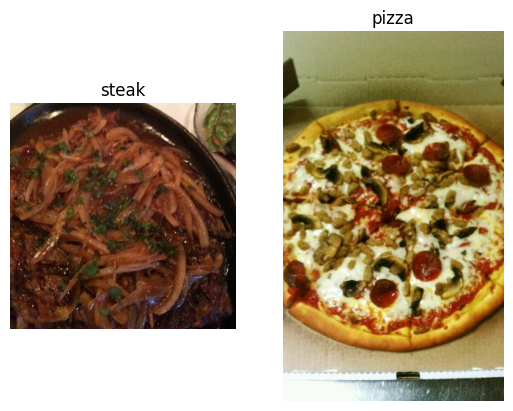

In [ ]:
# Visualize the Data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

### Preprocess Data (normalized data)

In [ ]:
# Define the directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_dir, test_dir

('/content/pizza_steak/train', '/content/pizza_steak/test')

Turn the data into **batches**

A batch is small subset of data, rather than look at all images at once, can look at 32 images at once and find patterns in those images.
Reasons:
1. X - images (1mil) might not fit in the memory (GPU)
2. Try to learn a pattern in X images in one hit - the model will not learn very well (32 images best )
3. Why 32?? 32 is good for your health! yaan leCun

In [ ]:
!nvidea-smi

/bin/bash: nvidea-smi: command not found


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in the data image from directories and then turn them into batches
# Overall, this line of code sets up a data generator object that will iterate
#   over the training images in batches, resize them to a consistent size,
#     and prepare the data for training a machine learning model.

train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224),  # tuple ( height, width)
                                               class_mode="binary",     # type of data working with
                                               batch_size=32)          # mini batches size to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Check the sample data from the directories
images, labels = train_data.next()  # get the next next batch size in the directory

len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there??
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.9058824 , 0.9450981 , 0.91372555],
          [0.90196085, 0.94117653, 0.909804  ],
          [0.91372555, 0.95294124, 0.9215687 ],
          ...,
          [0.82745105, 0.7176471 , 0.43137258],
          [0.86274517, 0.7568628 , 0.454902  ],
          [0.909804  , 0.80392164, 0.49411768]],
 
         [[0.9176471 , 0.9568628 , 0.92549026],
          [0.909804  , 0.9490197 , 0.9176471 ],
          [0.9176471 , 0.9568628 , 0.92549026],
          ...,
          [0.854902  , 0.74509805, 0.454902  ],
          [0.89019614, 0.7843138 , 0.47450984],
          [0.9058824 , 0.8000001 , 0.48235297]],
 
         [[0.9176471 , 0.9568628 , 0.92549026],
          [0.91372555, 0.95294124, 0.9215687 ],
          [0.9215687 , 0.9607844 , 0.9294118 ],
          ...,
          [0.8705883 , 0.76470596, 0.454902  ],
          [0.87843144, 0.7725491 , 0.454902  ],
          [0.8745099 , 0.7725491 , 0.4431373 ]],
 
         ...,
 
         [[0.8862746 , 0.7490196 , 0.6627451 ],
          [0.85490

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
labels

array([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

### 3. Create a CNN model ( baseline )

Simple model ~ Existing result set up when running a ml experiement

Want to beat the simple model **tweak**

* Note - in deep learning, almost an infinite amount of archectectures to create, start with something simple, see if it works, introduce complexity - (eg. what model is working best for your problem in the field)

In [ ]:
# Create the model a little bit more easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Build the model ( Base line )

model_4 = Sequential([
    Conv2D(filters=10, # filters in the number of sliding windows going across the input, ( higher == more complex )
           kernel_size=3, # the size of the sliding window going across an input
           strides=1,     # size of the step the sliding window takes across the input
           padding="valid", # if same reserves the input and output size, if valid, adds padding for precise
           activation="relu", #
           input_shape=(224, 224, 3)), # input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer working with binary classification
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model


In [ ]:
# Check the lengths ** batches **
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 255ms/step - loss: 0.7757 - accuracy: 0.6360 - val_loss: 0.4467 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4301 - accuracy: 0.8187 - val_loss: 0.4008 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3342 - accuracy: 0.8633 - val_loss: 0.3307 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.2335 - accuracy: 0.9200 - val_loss: 0.4285 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.1070 - accuracy: 0.9687 - val_loss: 0.4392 - val_accuracy: 0.8160


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 200ms/step - loss: 0.3806 - accuracy: 0.8260


[0.3805904686450958, 0.8259999752044678]

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 3s 153ms/step - loss: 0.4297 - accuracy: 0.8240


[0.4297155439853668, 0.8240000009536743]

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 5. Evaluate the model



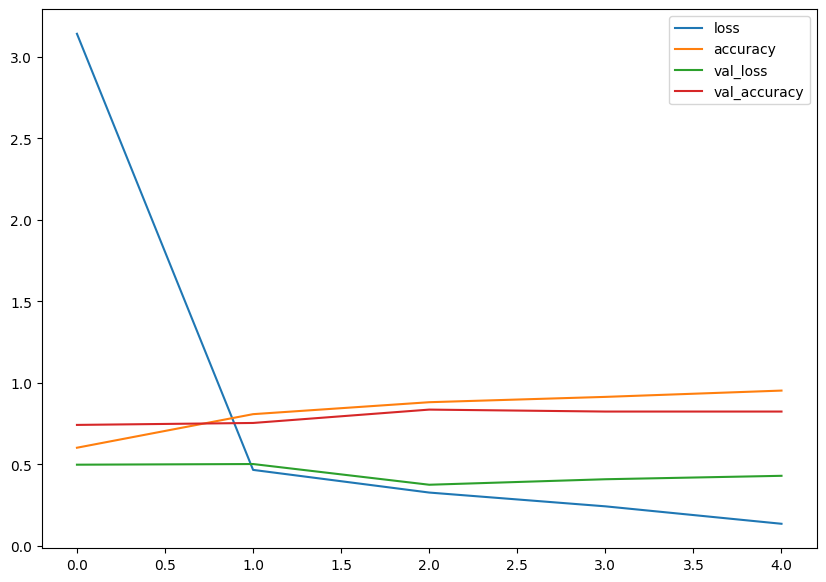

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

<Axes: >

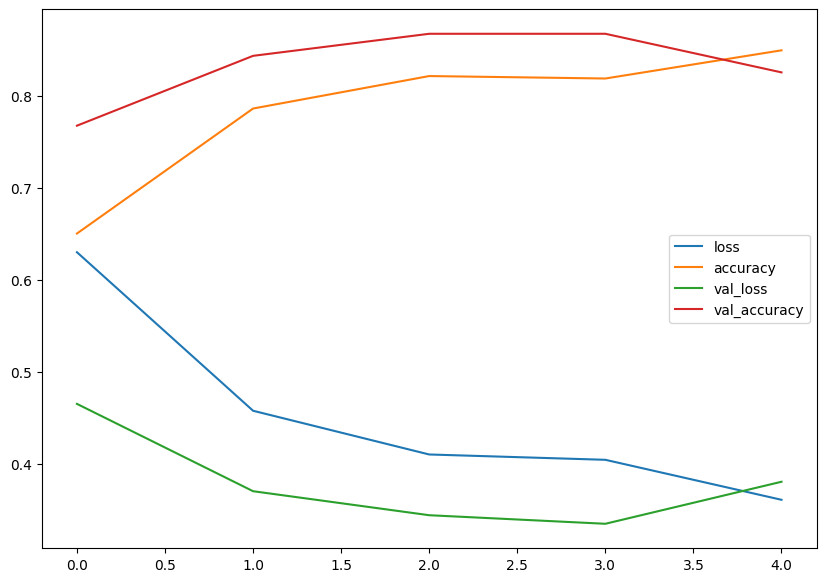

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curvers separately

def plot_loss_curves(history):
  """
  Returns loss curves for training and validation metrics
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]


  acurracy=history.history["accuracy"]
  val_acurracy=history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did it take to run

  # Plot the Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();


  # Plot the Accuracy
  plt.figure()
  plt.plot(epochs, acurracy, label="training_loss")
  plt.plot(epochs, val_acurracy, label="val_loss")
  plt.title("acurracy")
  plt.xlabel("epochs")
  plt.legend();


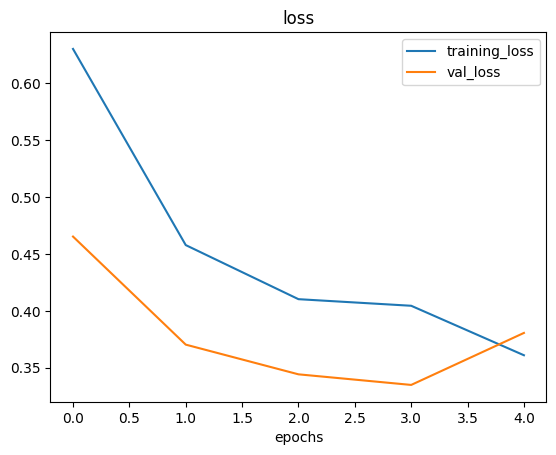

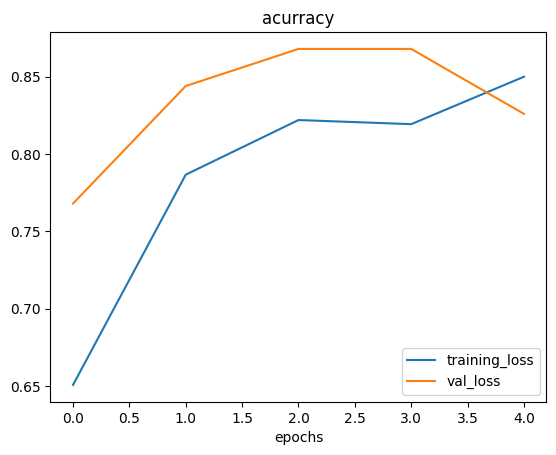

In [ ]:
plot_loss_curves(history=history_1)

### 6. Adjust the model performance

Fitting a machine learning model (3) steps:

0. Create a base line
1. Beat the base line by `overfitting` a larger model
2. Reduce `overfitting`

Ways to induce Overfitting:

* Increase the number of Conv Layers
* Increase the number of Conv filters
* Add another Dense layer to the Flattten layer



Ways to reduce Overfitting:
* Add data augmentation
* Add regularization layers (MaxPool2D)
* Add more data
* etc....

In [ ]:
# Packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Create the model a little bit more easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model *new base line*

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 232ms/step - loss: 0.6167 - accuracy: 0.6667 - val_loss: 0.5000 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.5009 - accuracy: 0.7707 - val_loss: 0.4431 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4300 - accuracy: 0.8140 - val_loss: 0.3561 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4078 - accuracy: 0.8127 - val_loss: 0.3372 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3774 - accuracy: 0.8280 - val_loss: 0.3235 - val_accuracy: 0.8580


In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

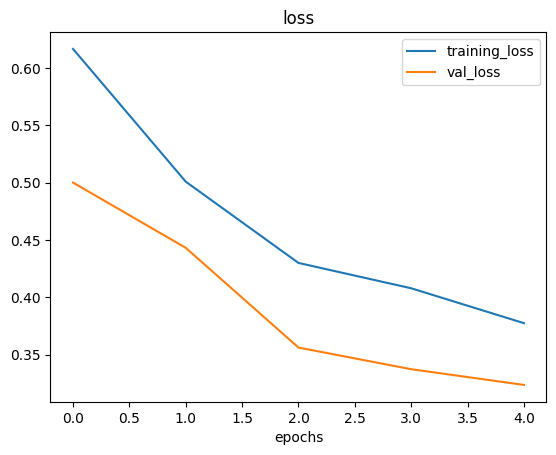

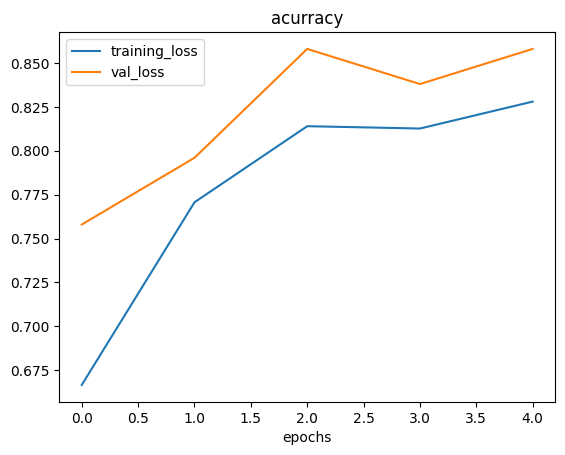

In [ ]:
# Plot loss curves
plot_loss_curves(history=history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with Augmentation

trained_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                                  rotation_range=0.2, # how much to rotate
                                                  shear_range=0.2, # how much do you want to shear an image
                                                  zoom_range=0.2,
                                                  width_shift_range=0.2,
                                                  height_shift_range=0.3,
                                                  horizontal_flip=True)

# Create ImageDataGenerator without Augmentation for train data
trained_datagen = ImageDataGenerator(rescale=1/225.)

# Creae ImageDataGenerator without Augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

What is Augmentation??

> Increase the diversity of the training dataset without collecting more data
(e.g. rotate the image, shift the image etc...) This will increse the diversity in which the model generalizes the data.

In [ ]:
# Import data and augmented it from training directory
print("Augmented Training Data:")
train_data_augmented = trained_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size=(224, 224),
                                                                     batch_size=32,
                                                                     class_mode="binary",
                                                                     shuffle=False)# Demonstration Only

# Create non augmented train data
print("Non-Augmented Data:")
train_data = trained_datagen.flow_from_directory(train_dir,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="binary",
                                                 shuffle=False)
IMG_SIZE=(224, 224)
batch_size=32
# Create non augmented test data
print("Non Augmented Test Data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=batch_size,
                                             class_mode="binary")



Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Data:
Found 1500 images belonging to 2 classes.
Non Augmented Test Data:
Found 500 images belonging to 2 classes.


> **Note** Data augmentation is usally only performed on the training data. Using `ImageDataGenerator` ~ the paramters don't change in the directory, changed when loaded in.

In [ ]:
# Get some augmented sample data and non augmented data
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next() # Labels are not augmented

Show image number: 2


(-0.5, 223.5, 223.5, -0.5)

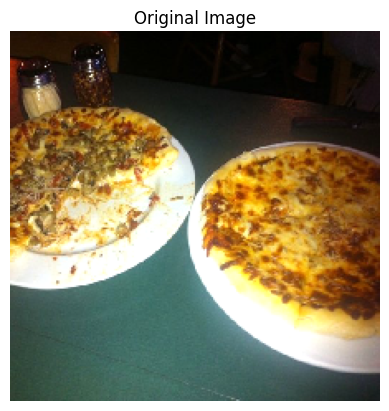

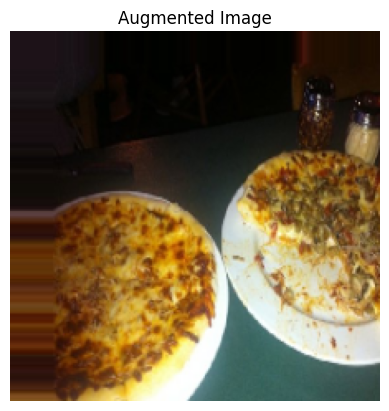

In [ ]:
# Show original Images
import random
random_number = random.randint(0, 32)
print(f"Show image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

Looked at Augmented Data ~ Now create a model on the augmented data.

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Build the Model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the Model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the Model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 558ms/step - loss: 0.7327 - accuracy: 0.3593 - val_loss: 0.6921 - val_accuracy: 0.5380
Epoch 2/5
47/47 [==============================] - 29s 604ms/step - loss: 0.6953 - accuracy: 0.4500 - val_loss: 0.6919 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6917 - accuracy: 0.5740 - val_loss: 0.6862 - val_accuracy: 0.5920
Epoch 4/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6963 - accuracy: 0.5547 - val_loss: 0.6857 - val_accuracy: 0.6380
Epoch 5/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6896 - accuracy: 0.5440 - val_loss: 0.6740 - val_accuracy: 0.7760


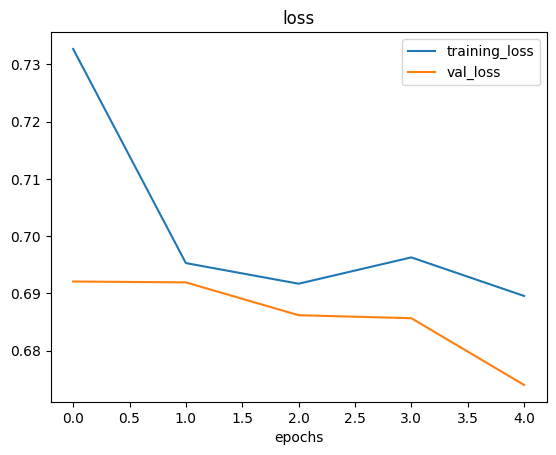

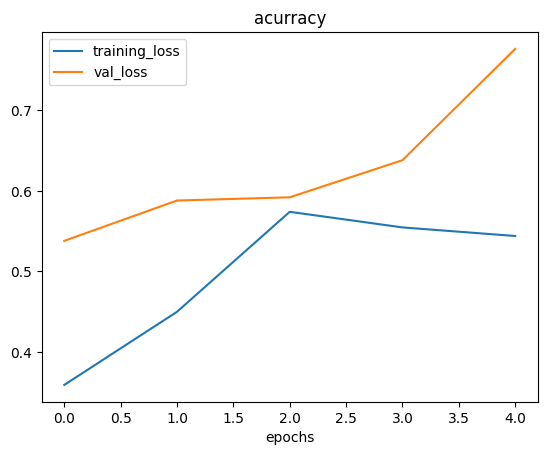

In [ ]:
plot_loss_curves(history=history_6)

Let's shuffle the training data and the augmented data. Train another model ( same as before )

In [ ]:
# Import data and augment it and shuffle from training directory
trained_data_augmented_shuffled = trained_datagen_augmented.flow_from_directory(train_dir,
                                                                                target_size=(224, 224),
                                                                                class_mode="binary",
                                                                                batch_size=32,
                                                                                shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create Model same as model_5 and model_6 **Tweaking the data** the models are the Same

# Random Seed
tf.random.set_seed(42)

# Build the Model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(trained_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(trained_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 540ms/step - loss: 0.6745 - accuracy: 0.5787 - val_loss: 0.5718 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5681 - accuracy: 0.7100 - val_loss: 0.4592 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 28s 597ms/step - loss: 0.5110 - accuracy: 0.7567 - val_loss: 0.3734 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 27s 580ms/step - loss: 0.4933 - accuracy: 0.7707 - val_loss: 0.3539 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.4794 - accuracy: 0.7880 - val_loss: 0.3577 - val_accuracy: 0.8640


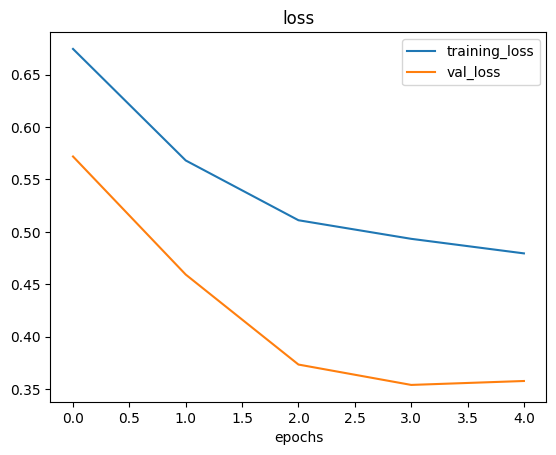

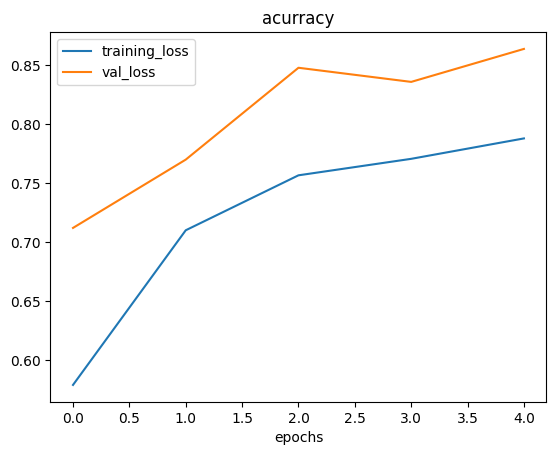

In [ ]:
plot_loss_curves(history_7)

Beaten the Base Line Model
Few Things can do to improve the model:
* Add more Layers (Conv2D, MaxPool2D)
* Add more filters in teh Conv2D layer 10 -> 32 -> 64
* Same arch and train for longer
* Ideal learning Rate Adam()
* Give the model more data to learn more
* Transfer learning ~ Leverage what another model has learned and fit it to this model

### Practice Model 1 on Augmented Data - Test
> Note use the augmented data shuffle

In [ ]:
# Seed
tf.random.set_seed(42)

# Build a CNN
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN Binary classification problem (metrics??)
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(trained_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(trained_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 650ms/step - loss: 0.6949 - accuracy: 0.5720 - val_loss: 0.6148 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 34s 726ms/step - loss: 0.5680 - accuracy: 0.7033 - val_loss: 0.4116 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 31s 668ms/step - loss: 0.5321 - accuracy: 0.7307 - val_loss: 0.3815 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 31s 648ms/step - loss: 0.5332 - accuracy: 0.7473 - val_loss: 0.3664 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 29s 608ms/step - loss: 0.4851 - accuracy: 0.7687 - val_loss: 0.3829 - val_accuracy: 0.8400


### Making a prediction with the trained model with custom data ( e.g. own image/label)

In [ ]:
# Classes working with
print(f'Class Names: {class_names}')

Class Names: ['pizza' 'steak']


--2023-07-05 20:48:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-07-05 20:48:52 (88.9 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



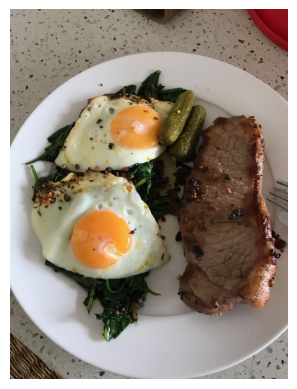

In [ ]:
# View an example image from Github
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak_image = mpimg.imread("03-steak.jpeg")
plt.imshow(steak_image)
plt.axis(False);

In [ ]:
# Image Shape
steak_image.shape

(4032, 3024, 3)

In [ ]:
# Image Array -> Tensor
steak_image

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**Note**
Imported data needs to be preprocessed into the same format as the model was trained on

In [ ]:
expanded_image_steak = tf.expand_dims(steak_image, axis=0)

In [ ]:
# Build a helper function

def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from the filename, turns it into a tensor and reshapes it to the target
  image shape (e.g image shape = (224, 224))
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the img into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # -----------------------------------------
  # Rescale the image
  img = img/255.

  return img

In [ ]:
# Load in and preprocess the image
steak = load_and_prep_image(filename="03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Now test it
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 58ms/step


array([[0.82802397]], dtype=float32)

Current output is a probability of what it can be ~ nice to visualize the image as well as model's prediction

In [ ]:
# Class Names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Can index the predicted class by rounding the prediction probablility and indexing
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_plot(model, filename, class_names=class_names):
  """
  Import an image located in the filename, makes a prediction with the model,
  plots the image with the predicted class as the title.
  """

  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction from the image *may need to exand dims
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted clas
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image with the predicted Title
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



1/1 [==============================] - 0s 28ms/step


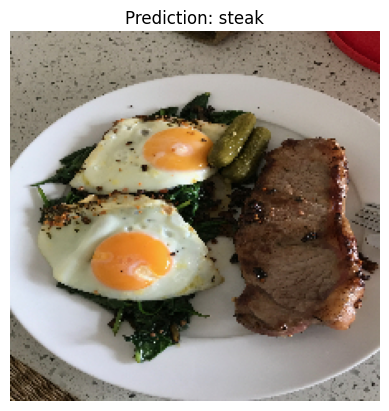

In [ ]:
# Use the above helper function to predict and plot
pred_plot(model_7, "03-steak.jpeg")

Model works Try it on another Image

--2023-07-05 21:21:27--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-07-05 21:21:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-07-05 21:21:29 (67.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

FINISHED --2023-07-05 21:21:29--
Total wall clock time: 2.2s
Downloaded: 1 files, 2.7M in 0.04s (67.4 MB/s)
1/1 [==============================] - 0s 24ms/step


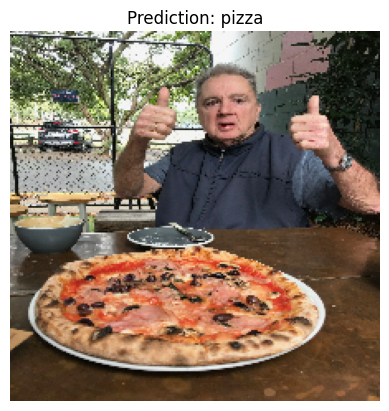

In [ ]:
# Download another custom image and make a prediction on it
!wget = https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

> Target
> Model classes
1. Become one with the data
2. Preprocess the data
3. Create a model ( start with a baseline)
4. Fit the model ( want to overfitt ~ tweak )
5. Evaluate the model
6. Adjust different hyperparameters and improve the model ( beat the base model created ~ reduce overfitting)

In [ ]:
# Packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Create the model a little bit more easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# TensorFlow packages
from tensorflow.python.ops.gen_batch_ops import batch
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Import the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-06 14:29:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  30.2MB/s    in 17s     

2023-07-06 14:30:16 (29.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through the '10_food_classes_all_data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")

There are 2 directories and 0 images in '10_food_classes_all_data.'
There are 10 directories and 0 images in '10_food_classes_all_data/test.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak.'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice.'
There are 

In [ ]:
# Setup train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class Names
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(f'Class Names: {class_names}')

Class Names: ['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  """
  Get a random image - target directory as well as the target class getting from

  """

  target_folder = target_dir + target_class

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f'Name of Image: {random_image}')

  # Read in the image then plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])


  # Show the image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f'Image shape: {img.shape}')

  return img

Name of Image: ['1417472.jpg']
Image shape: (512, 512, 3)


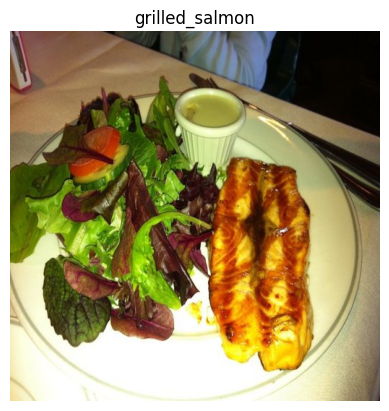

In [ ]:
# Visualize the Images
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
len(class_names)

10

### Preprocess the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

# Load data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a Model **Start with a BaseLine**
> Take the model presented in the CNN explainer TingVGG architecture

In [ ]:
# Creat the Model
# CNN Explainer shape (224, 224)

# Set the Seed
tf.random.set_seed(42)


# Build the Model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10), # changed to have 10 output neurons and using 'softmax'
    Activation(activation="softmax")
])

# Compile the Model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 677s 3s/step - loss: 7.3713 - accuracy: 0.1036 - val_loss: 2.3019 - val_accuracy: 0.1128
Epoch 2/5
235/235 [==============================] - 634s 3s/step - loss: 2.2650 - accuracy: 0.1401 - val_loss: 2.3085 - val_accuracy: 0.1104
Epoch 3/5
235/235 [==============================] - 636s 3s/step - loss: 2.1001 - accuracy: 0.2313 - val_loss: 2.3842 - val_accuracy: 0.1252
Epoch 4/5
235/235 [==============================] - 613s 3s/step - loss: 1.8230 - accuracy: 0.3417 - val_loss: 2.6916 - val_accuracy: 0.1472
Epoch 5/5
235/235 [==============================] - 629s 3s/step - loss: 1.4837 - accuracy: 0.4879 - val_loss: 2.9187 - val_accuracy: 0.1368
